# 수원시 폐의약품 발생량 추정을 위한 입지분석 

## 1. Module Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# plt.rc('font', family='Malgun Gothic') # For windows
plt.rc('font', family='AppleGothic') # For MacOS
import warnings
warnings.filterwarnings(action='ignore') 
pd.set_option('display.max_rows', None)

## 2. 데이터 업로드

### (1) 데이터 경로 정의

In [2]:
HP_T60_2020_1_path = './데이터(원본)/HP_T60_2020_1.csv'
medicine_dangerous_path = './데이터(원본)/유해도 의약품.csv'
Suwon_people = './데이터(원본)/수원시 인구 통계.csv'

### (2) 데이터 불러오기

In [3]:
# 의약품 처방정보
HP1 = pd.read_csv(HP_T60_2020_1_path, encoding='CP949')
HP1.head()

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자
0,2020,370,11788523,1,2,13,41,2020-10-16,222901ATB,1.0,3,3,103.0,927,2021-12-29
1,2020,466,9794740,1,2,13,41,2020-06-05,222901ATB,1.0,3,3,103.0,927,2021-12-29
2,2020,538,5620454,1,2,9,41,2020-11-28,222901ATB,1.0,3,3,103.0,927,2021-12-29
3,2020,4502,10243587,1,2,14,41,2020-03-24,222901ATB,1.0,3,3,103.0,927,2021-12-29
4,2020,4502,1097699,1,2,14,41,2020-10-31,222901ATB,1.0,3,3,103.0,927,2021-12-29


In [4]:
HP1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10994920 entries, 0 to 10994919
Data columns (total 15 columns):
 #   Column       Dtype  
---  ------       -----  
 0   기준년도         int64  
 1   가입자 일련번호     int64  
 2   처방내역일련번호     int64  
 3   일련번호         int64  
 4   성별코드         int64  
 5   연령대코드(5세단위)  int64  
 6   시도코드         int64  
 7   요양개시일자       object 
 8   약품일반성분명코드    object 
 9   1회 투약량       float64
 10  1일투약량        int64  
 11  총투여일수        int64  
 12  단가           float64
 13  금액           int64  
 14  데이터 공개일자     object 
dtypes: float64(2), int64(10), object(3)
memory usage: 1.2+ GB


In [5]:
# 의약품 분류 데이터
MD1 = pd.read_csv(medicine_dangerous_path)
MD1.head()

,일반명코드,일반명
0,101301AEL,ace
1,D13800ACS,ace
2,D13700ACS,ace
3,D13700ACS,ace
4,D13600ACS,ace


In [6]:
MD1['일반명'].unique()

array(['ace', 'ben', 'cla', 'dic', 'dip', 'ibu', 'mef', 'rox'],
      dtype=object)

In [7]:
MD1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   일반명코드   1339 non-null   object
 1   일반명     1339 non-null   object
dtypes: object(2)
memory usage: 21.0+ KB


In [8]:
# 수원시 인구 데이터
LP1 = pd.read_csv(Suwon_people, encoding='CP949')
LP1.head()

,행정구역(구동)별(1),행정구역(구동)별(2),합계,합계.1,합계.2,0∼4세,0∼4세.1,0∼4세.2,5∼9세,5∼9세.1,...,70∼74 세.2,75∼79세,75∼79세.1,75∼79세.2,80∼84세,80∼84세.1,80∼84세.2,85세이상,85세이상.1,85세이상.2
0,행정구역(구동)별(1),행정구역(구동)별(2),계,남,여,계,남,여,계,남,...,여,계,남,여,계,남,여,계,남,여
1,장안구,소계,273940,137861,136079,6645,3386,3259,10857,5568,...,4753,7021,2974,4047,5129,2035,3094,4310,1219,3091
2,장안구,파장동,23285,11779,11506,477,260,217,709,356,...,509,725,288,437,533,214,319,412,105,307
3,장안구,율천동,42174,22330,19844,1135,585,550,1686,847,...,527,745,319,426,589,203,386,477,147,330
4,장안구,정자1동,28902,14208,14694,789,406,383,1474,759,...,452,626,258,368,490,201,289,409,103,306


In [9]:
LP1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 59 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   행정구역(구동)별(1)  49 non-null     object
 1   행정구역(구동)별(2)  49 non-null     object
 2   합계            49 non-null     object
 3   합계.1          49 non-null     object
 4   합계.2          49 non-null     object
 5   0∼4세          49 non-null     object
 6   0∼4세.1        49 non-null     object
 7   0∼4세.2        49 non-null     object
 8   5∼9세          49 non-null     object
 9   5∼9세.1        49 non-null     object
 10  5∼9세.2        49 non-null     object
 11  10∼14세        49 non-null     object
 12  10∼14세.1      49 non-null     object
 13  10∼14세.2      49 non-null     object
 14  15∼19세        49 non-null     object
 15  15∼19세.1      49 non-null     object
 16  15∼19세.2      49 non-null     object
 17  20∼24세        49 non-null     object
 18  20∼24세.1      49 non-null     object
 19  20∼24세.2  

### (3) 데이터 정보 확인

#### 의약품처방데이터

In [11]:
HP1.head()

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자
0,2020,370,11788523,1,2,13,41,2020-10-16,222901ATB,1.0,3,3,103.0,927,2021-12-29
1,2020,466,9794740,1,2,13,41,2020-06-05,222901ATB,1.0,3,3,103.0,927,2021-12-29
2,2020,538,5620454,1,2,9,41,2020-11-28,222901ATB,1.0,3,3,103.0,927,2021-12-29
3,2020,4502,10243587,1,2,14,41,2020-03-24,222901ATB,1.0,3,3,103.0,927,2021-12-29
4,2020,4502,1097699,1,2,14,41,2020-10-31,222901ATB,1.0,3,3,103.0,927,2021-12-29


### [columns information]
1. 기준년도: 해당 정보의 기준년도를 제공함
2. 가입자 일련번호: 해당가입자에 부여한 일련번호
- 1 ~ 1,000,000
3. 처방내역일련번호: 해당 처방전에 부여한 일련번호
4. 일련번호: 해당 약품 일련번호
5. 성별코드: 해당 정보 대상자의 성별을 제공함
- ­성별 : 1(남자), 2(여자)
6. 연령대코드(5세단위): 기준년도에 수진자의 나이를 5세 단위로 그룹화(범주화)하여 구분한 코드
- (총 18개 그룹) 0~84세까지 5세 단위 그룹화, 85세 이상은 85+로 그룹화
- 그룹1: 0-4세, 그룹2: 5-9세, ..., 그룹17: 80-84세, 그룹18: 85세+
7. 시도코드: 해당 수진자 거주지의 시도코드
- 2012년부터 세종특별자치시가 신규로 편입됨에 따라, 2011년까지의 데이터에는 해당 항목이 존재하지 않음
- 시도코드는 행안부 시도코드를 준용
8. 요양개시일자
- (외래진료) 해당 상병의 요양급여를 위해 수진자가 요양기관에 내원한 연, 월, 일
- (입원진료) 해당 상병의 진료를 위하여 그 달에 최초 입원한 연, 월, 일
9. 약품일반성분명 코드: 의약품의 주성분코드
- 매월 고시되는 보건복지부 고시「약제급여목록 및 급여상한금액표」참고
- 코드: 영문, 숫자 혼합 9자리, 단, 구코드는 영문, 숫자 혼합 8자리
10. 1회 투약량: 수진자에게 투여한 의약품의 1회 투약량(소수 다섯째자리에서 4사5입하여 소수 넷째자리 확인 가능)
11. 수진자에게 1일 간 의약품을 투여한 횟수
12. 해당 의약품을 수진자에게 투여한 총 일수
13. 단가: 처방 내역상의 의약품 단가
14. 금액: 단가, 1회 투약량, 1일 투약량, 총투여일수를 곱한 금액
- 652101370 트렌탈 400 서방정 1회 1정, 1일 2회,   2일 투여시 ⥤ 190(원)×1(정)×2(회)×2(일)= 760원
15. 데이터 공개일자: 데이터 작성 기준 일자

In [12]:
HP1['기준년도'].unique()

array([2020])

In [13]:
HP1['가입자 일련번호'].unique()

array([   370,    466,    538, ...,  75960, 279837, 157997])

In [14]:
HP1['가입자 일련번호'].nunique()

333334

In [16]:
HP1['일련번호'].unique()

array([ 1,  2,  4,  3,  5,  7,  6,  8, 10, 11,  9, 14, 12, 13, 15, 17, 22,
       16, 18, 19, 21, 20, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72])

In [17]:
HP1['일련번호'].value_counts()

1     2926799
2     2645610
3     2195106
4     1546686
5      895382
6      411692
7      180872
8       87757
9       46607
10      26093
11      14553
12       7926
13       4274
14       2358
15       1317
16        730
17        474
18        275
19        165
20         93
21         52
22         28
23         12
24          7
25          3
26          2
27          2
52          1
53          1
54          1
55          1
56          1
57          1
58          1
59          1
60          1
61          1
62          1
50          1
63          1
64          1
65          1
66          1
67          1
68          1
69          1
70          1
71          1
51          1
37          1
49          1
48          1
28          1
29          1
30          1
31          1
32          1
33          1
34          1
35          1
36          1
38          1
39          1
40          1
41          1
42          1
43          1
44          1
45          1
46          1
47          1
72    

In [18]:
HP1['성별코드'].value_counts()

2    6120744
1    4874176
Name: 성별코드, dtype: int64

In [19]:
HP1['연령대코드(5세단위)'].unique()

array([13,  9, 14,  4, 10, 12,  8, 16,  7,  5,  3,  6, 11, 15, 17, 18,  2,
        1])

In [20]:
HP1['연령대코드(5세단위)'].value_counts()

13    1147580
14    1044602
12     955698
15     916596
16     825314
11     810824
10     670604
1      625751
17     593841
9      556475
8      499588
2      457300
7      380575
6      377180
18     372808
5      305006
4      236073
3      219105
Name: 연령대코드(5세단위), dtype: int64

In [21]:
HP1['시도코드'].unique()

array([41, 11, 46, 27, 48, 26, 36, 49, 28, 47, 43, 30, 44, 45, 42, 31, 29])

In [22]:
HP1['약품일반성분명코드'].unique()

array(['222901ATB', '421001ATB', '113232APD', ..., '361302CLT',
       '530099COS', '473501APD'], dtype=object)

In [23]:
HP1['1회 투약량'].describe()

count    1.099492e+07
mean     1.711204e+00
std      8.203179e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      4.500000e+03
Name: 1회 투약량, dtype: float64

In [24]:
HP1['1일투약량'].describe()

count    1.099492e+07
mean     2.063056e+00
std      8.502334e-01
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      6.000000e+01
Name: 1일투약량, dtype: float64

In [25]:
HP1['총투여일수'].describe()

count    1.099492e+07
mean     1.587909e+01
std      2.505720e+01
min      0.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      2.000000e+01
max      7.840000e+02
Name: 총투여일수, dtype: float64

In [26]:
HP1['단가'].describe()

count    1.099492e+07
mean     6.566868e+02
std      3.325235e+03
min      0.000000e+00
25%      9.000000e+01
50%      1.510000e+02
75%      4.290000e+02
max      4.115580e+05
Name: 단가, dtype: float64

In [27]:
HP1['금액'].describe()

count    1.099492e+07
mean     9.072560e+03
std      4.482877e+04
min      0.000000e+00
25%      9.000000e+02
50%      2.100000e+03
75%      6.940000e+03
max      2.386776e+07
Name: 금액, dtype: float64

## 3. 데이터 EDA & 전처리

#### 1) 의약품 처방정보 데이터

In [28]:
HP1.head()

,기준년도,가입자 일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일투약량,총투여일수,단가,금액,데이터 공개일자
0,2020,370,11788523,1,2,13,41,2020-10-16,222901ATB,1.0,3,3,103.0,927,2021-12-29
1,2020,466,9794740,1,2,13,41,2020-06-05,222901ATB,1.0,3,3,103.0,927,2021-12-29
2,2020,538,5620454,1,2,9,41,2020-11-28,222901ATB,1.0,3,3,103.0,927,2021-12-29
3,2020,4502,10243587,1,2,14,41,2020-03-24,222901ATB,1.0,3,3,103.0,927,2021-12-29
4,2020,4502,1097699,1,2,14,41,2020-10-31,222901ATB,1.0,3,3,103.0,927,2021-12-29


In [29]:
# 의약품처방정보 필요 columns 추출
HP2 = HP1
HP3 = HP2.drop(['기준년도', '가입자 일련번호', '처방내역일련번호', '일련번호', '시도코드', '요양개시일자', '단가', '금액', '데이터 공개일자'], axis=1)
HP3.head()

,성별코드,연령대코드(5세단위),약품일반성분명코드,1회 투약량,1일투약량,총투여일수
0,2,13,222901ATB,1.0,3,3
1,2,13,222901ATB,1.0,3,3
2,2,9,222901ATB,1.0,3,3
3,2,14,222901ATB,1.0,3,3
4,2,14,222901ATB,1.0,3,3


In [30]:
# 유해도가 있는 의약품만 추출
med_ing_list = MD1['일반명코드']
HP4 = HP3[HP3['약품일반성분명코드'].isin(med_ing_list)]
HP4.head()

,성별코드,연령대코드(5세단위),약품일반성분명코드,1회 투약량,1일투약량,총투여일수
137290,2,15,480600ATB,1.0,3,3
137295,2,15,480600ATB,1.0,3,3
137300,2,15,480600ATB,1.0,3,3
137305,2,15,480600ATB,1.0,3,3
137311,2,15,480600ATB,1.0,3,3


In [31]:
HP4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583387 entries, 137290 to 10994914
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   성별코드         583387 non-null  int64  
 1   연령대코드(5세단위)  583387 non-null  int64  
 2   약품일반성분명코드    583387 non-null  object 
 3   1회 투약량       583387 non-null  float64
 4   1일투약량        583387 non-null  int64  
 5   총투여일수        583387 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 31.2+ MB


In [32]:
# 총 투약량 산출
HP4['총투약량'] = HP4['1회 투약량'] * HP4['1일투약량'] * HP4['총투여일수']

In [33]:
HP4.head()

,성별코드,연령대코드(5세단위),약품일반성분명코드,1회 투약량,1일투약량,총투여일수,총투약량
137290,2,15,480600ATB,1.0,3,3,9.0
137295,2,15,480600ATB,1.0,3,3,9.0
137300,2,15,480600ATB,1.0,3,3,9.0
137305,2,15,480600ATB,1.0,3,3,9.0
137311,2,15,480600ATB,1.0,3,3,9.0


In [34]:
HP5 = HP4.drop(['1회 투약량', '1일투약량', '총투여일수'], axis=1)
HP5.head()

,성별코드,연령대코드(5세단위),약품일반성분명코드,총투약량
137290,2,15,480600ATB,9.0
137295,2,15,480600ATB,9.0
137300,2,15,480600ATB,9.0
137305,2,15,480600ATB,9.0
137311,2,15,480600ATB,9.0


In [35]:
# 연령대 코드 setting
idx = HP5[HP5['연령대코드(5세단위)'] <= 4].index
idx

Int64Index([  152245,   164887,   164911,   164956,   164995,   165008,
              165012,   165015,   165021,   165030,
            ...
            10994744, 10994756, 10994772, 10994789, 10994794, 10994863,
            10994867, 10994873, 10994893, 10994914],
           dtype='int64', length=88241)

In [36]:
HP5 = HP5.drop(idx)
HP5['연령대코드(5세단위)'].unique()

array([15, 16, 17, 14, 13, 12,  8, 18,  9, 10,  5, 11,  7,  6])

In [37]:
HP5['연령대코드'] = ""
HP5.head()

,성별코드,연령대코드(5세단위),약품일반성분명코드,총투약량,연령대코드
137290,2,15,480600ATB,9.0,
137295,2,15,480600ATB,9.0,
137300,2,15,480600ATB,9.0,
137305,2,15,480600ATB,9.0,
137311,2,15,480600ATB,9.0,


In [38]:
HP5.loc[(HP5['연령대코드(5세단위)'] == 5), '연령대코드'] = '20'
HP5.loc[(HP5['연령대코드(5세단위)'] == 6), '연령대코드'] = '20'
HP5.loc[(HP5['연령대코드(5세단위)'] == 7), '연령대코드'] = '30'
HP5.loc[(HP5['연령대코드(5세단위)'] == 8), '연령대코드'] = '30'
HP5.loc[(HP5['연령대코드(5세단위)'] == 9), '연령대코드'] = '40'
HP5.loc[(HP5['연령대코드(5세단위)'] == 10), '연령대코드'] = '40'
HP5.loc[(HP5['연령대코드(5세단위)'] == 11), '연령대코드'] = '50'
HP5.loc[(HP5['연령대코드(5세단위)'] == 12), '연령대코드'] = '50'
HP5.loc[(HP5['연령대코드(5세단위)'] == 13), '연령대코드'] = '60'
HP5.loc[(HP5['연령대코드(5세단위)'] == 14), '연령대코드'] = '60'
HP5.loc[(HP5['연령대코드(5세단위)'] == 15), '연령대코드'] = '70'
HP5.loc[(HP5['연령대코드(5세단위)'] == 16), '연령대코드'] = '70'
HP5.loc[(HP5['연령대코드(5세단위)'] == 17), '연령대코드'] = '70'
HP5.loc[(HP5['연령대코드(5세단위)'] == 18), '연령대코드'] = '70'

In [39]:
HP5.head()

,성별코드,연령대코드(5세단위),약품일반성분명코드,총투약량,연령대코드
137290,2,15,480600ATB,9.0,70
137295,2,15,480600ATB,9.0,70
137300,2,15,480600ATB,9.0,70
137305,2,15,480600ATB,9.0,70
137311,2,15,480600ATB,9.0,70


In [40]:
HP5 = HP5.drop(['연령대코드(5세단위)'], axis=1)
HP5.head()

,성별코드,약품일반성분명코드,총투약량,연령대코드
137290,2,480600ATB,9.0,70
137295,2,480600ATB,9.0,70
137300,2,480600ATB,9.0,70
137305,2,480600ATB,9.0,70
137311,2,480600ATB,9.0,70


In [41]:
HP5 = HP5[['성별코드', '연령대코드', '약품일반성분명코드', '총투약량']]
HP5.head()

,성별코드,연령대코드,약품일반성분명코드,총투약량
137290,2,70,480600ATB,9.0
137295,2,70,480600ATB,9.0
137300,2,70,480600ATB,9.0
137305,2,70,480600ATB,9.0
137311,2,70,480600ATB,9.0


In [42]:
HP5 = HP5.reset_index()

In [43]:
HP5 = HP5.drop(['index'], axis=1)
HP5.head()

,성별코드,연령대코드,약품일반성분명코드,총투약량
0,2,70,480600ATB,9.0
1,2,70,480600ATB,9.0
2,2,70,480600ATB,9.0
3,2,70,480600ATB,9.0
4,2,70,480600ATB,9.0


In [44]:
HP5.dtypes

성별코드           int64
연령대코드         object
약품일반성분명코드     object
총투약량         float64
dtype: object

In [45]:
HP5 = HP5.astype({'성별코드' : 'object'})
HP5.dtypes

성별코드          object
연령대코드         object
약품일반성분명코드     object
총투약량         float64
dtype: object

In [46]:
MD1['일반명'].unique()

array(['ace', 'ben', 'cla', 'dic', 'dip', 'ibu', 'mef', 'rox'],
      dtype=object)

In [47]:
MD1.head()

,일반명코드,일반명
0,101301AEL,ace
1,D13800ACS,ace
2,D13700ACS,ace
3,D13700ACS,ace
4,D13600ACS,ace


In [48]:
# 유해도 가중치 적용
ace_df = MD1[MD1['일반명'] == 'ace']
ace_list = ace_df['일반명코드'].values.tolist()

In [49]:
ben_df = MD1[MD1['일반명'] == 'ben']
ben_list = ben_df['일반명코드'].values.tolist()

In [50]:
cla_df = MD1[MD1['일반명'] == 'cla']
cla_list = cla_df['일반명코드'].values.tolist()

In [51]:
dic_df = MD1[MD1['일반명'] == 'dic']
dic_list = dic_df['일반명코드'].values.tolist()

In [52]:
dip_df = MD1[MD1['일반명'] == 'dip']
dip_list = dip_df['일반명코드'].values.tolist()

In [53]:
ibu_df = MD1[MD1['일반명'] == 'ibu']
ibu_list = ibu_df['일반명코드'].values.tolist()

In [54]:
mef_df = MD1[MD1['일반명'] == 'mef']
mef_list = mef_df['일반명코드'].values.tolist()

In [55]:
rox_df = MD1[MD1['일반명'] == 'rox']
rox_list = rox_df['일반명코드'].values.tolist()

In [56]:
HP5['약품성분']=""
HP5.head()

,성별코드,연령대코드,약품일반성분명코드,총투약량,약품성분
0,2,70,480600ATB,9.0,
1,2,70,480600ATB,9.0,
2,2,70,480600ATB,9.0,
3,2,70,480600ATB,9.0,
4,2,70,480600ATB,9.0,


In [57]:
HP5.loc[HP5['약품일반성분명코드'].isin(ace_list), '약품성분'] = 'ace'
HP5.loc[HP5['약품일반성분명코드'].isin(ben_list), '약품성분'] = 'ben'
HP5.loc[HP5['약품일반성분명코드'].isin(cla_list), '약품성분'] = 'cla'
HP5.loc[HP5['약품일반성분명코드'].isin(dic_list), '약품성분'] = 'dic'
HP5.loc[HP5['약품일반성분명코드'].isin(dip_list), '약품성분'] = 'dip'
HP5.loc[HP5['약품일반성분명코드'].isin(ibu_list), '약품성분'] = 'ibu'
HP5.loc[HP5['약품일반성분명코드'].isin(mef_list), '약품성분'] = 'mef'
HP5.loc[HP5['약품일반성분명코드'].isin(rox_list), '약품성분'] = 'rox'

In [58]:
HP5 = HP5[['성별코드', '연령대코드', '약품일반성분명코드', '약품성분', '총투약량']]
HP5.head()

,성별코드,연령대코드,약품일반성분명코드,약품성분,총투약량
0,2,70,480600ATB,ace,9.0
1,2,70,480600ATB,ace,9.0
2,2,70,480600ATB,ace,9.0
3,2,70,480600ATB,ace,9.0
4,2,70,480600ATB,ace,9.0


In [59]:
HP6 = HP5.drop(['약품일반성분명코드'], axis=1)
HP6.head()

,성별코드,연령대코드,약품성분,총투약량
0,2,70,ace,9.0
1,2,70,ace,9.0
2,2,70,ace,9.0
3,2,70,ace,9.0
4,2,70,ace,9.0


In [60]:
HP6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495146 entries, 0 to 495145
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   성별코드    495146 non-null  object 
 1   연령대코드   495146 non-null  object 
 2   약품성분    495146 non-null  object 
 3   총투약량    495146 non-null  float64
dtypes: float64(1), object(3)
memory usage: 15.1+ MB


In [61]:
HP6['약품성분'].unique()

array(['ace', 'mef', 'ibu', 'rox', 'dic', 'cla'], dtype=object)

In [62]:
HP6['유해도고려'] = ""

In [63]:
HP6.head()

,성별코드,연령대코드,약품성분,총투약량,유해도고려
0,2,70,ace,9.0,
1,2,70,ace,9.0,
2,2,70,ace,9.0,
3,2,70,ace,9.0,
4,2,70,ace,9.0,


In [64]:
# 유해도를 고려한 폐의약품 발생량 추정
# 유해도 가중치 적용
'''
def IngWeight(x):
    if HP6['약품성분'] == 'ace':
        return x * 61.3
    elif HP6['약품성분'] == 'ben':
        return x * 489.1
    elif HP6['약품성분'] == 'cla':
        return x * 2.1
    elif HP6['약품성분'] == 'dic':
        return x * 0.3
    elif HP6['약품성분'] == 'dip':
        return x * 109
    elif HP6['약품성분'] == 'flo':
        return x * 0.2
    elif HP6['약품성분'] == 'ibu':
        return x * 83.8
    elif HP6['약품성분'] == 'mef':
        return x * 45.5
    elif HP6['약품성분'] == 'rox':
        return x * 0.2
    else:
        return x * 0

HP6['유해도고려'] = HP6['총투약량'].apply(IngWeight) -> Value error 유발로 보류
'''

"\ndef IngWeight(x):\n    if HP6['약품성분'] == 'ace':\n        return x * 61.3\n    elif HP6['약품성분'] == 'ben':\n        return x * 489.1\n    elif HP6['약품성분'] == 'cla':\n        return x * 2.1\n    elif HP6['약품성분'] == 'dic':\n        return x * 0.3\n    elif HP6['약품성분'] == 'dip':\n        return x * 109\n    elif HP6['약품성분'] == 'flo':\n        return x * 0.2\n    elif HP6['약품성분'] == 'ibu':\n        return x * 83.8\n    elif HP6['약품성분'] == 'mef':\n        return x * 45.5\n    elif HP6['약품성분'] == 'rox':\n        return x * 0.2\n    else:\n        return x * 0\n\nHP6['유해도고려'] = HP6['총투약량'].apply(IngWeight) -> Value error 유발로 보류\n"

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all(). 진단 및 해결: https://linuxpip.org/valueerror-the-truth-value-of-a-series-is-ambiguous/

https://datastory1.blogspot.com/2017/11/pd-bool.html

In [65]:
# 유해도를 고려한 폐의약품 발생량 추정
# 유해도 가중치 적용
def IngWeight(x, ingredient):
    if ingredient == 'ace':
        return x * 61.3
    elif ingredient == 'ben':
        return x * 489.1
    elif ingredient == 'cla':
        return x * 2.1
    elif ingredient == 'dic':
        return x * 0.3
    elif ingredient == 'dip':
        return x * 109
    elif ingredient == 'flo':
        return x * 0.2
    elif ingredient == 'ibu':
        return x * 83.8
    elif ingredient == 'mef':
        return x * 45.5
    elif ingredient == 'rox':
        return x * 0.2
    else:
        return x * 0

HP6['유해도고려'] = HP6.apply(lambda row: IngWeight(row['총투약량'], row['약품성분']), axis=1)

In [66]:
HP6['유해도고려'].describe()

count    495146.000000
mean       1017.297933
std        1521.049682
min           0.000000
25%         367.800000
50%         551.700000
75%         919.500000
max       99306.000000
Name: 유해도고려, dtype: float64

In [67]:
HP6.head()

,성별코드,연령대코드,약품성분,총투약량,유해도고려
0,2,70,ace,9.0,551.7
1,2,70,ace,9.0,551.7
2,2,70,ace,9.0,551.7
3,2,70,ace,9.0,551.7
4,2,70,ace,9.0,551.7


In [68]:
# 성별 가중치 적용
def SexWeight(x, sex):
    if sex == 1:
        return x * 0.371
    elif sex == 2:
        return x * 0.3205
    else:
        return x * 0

HP6['성별고려'] = HP6.apply(lambda row: SexWeight(row['유해도고려'], row['성별코드']), axis=1)

In [69]:
HP6.head()

,성별코드,연령대코드,약품성분,총투약량,유해도고려,성별고려
0,2,70,ace,9.0,551.7,176.81985
1,2,70,ace,9.0,551.7,176.81985
2,2,70,ace,9.0,551.7,176.81985
3,2,70,ace,9.0,551.7,176.81985
4,2,70,ace,9.0,551.7,176.81985


In [70]:
# 연령별 가중치 적용
def AgeWeight(x, age):
    if age == '20':
        return x * 0.4234
    elif age == '30':
        return x * 0.3515
    elif age == '40':
        return x * 0.3571
    elif age == '50':
        return x * 0.368
    elif age == '60':
        return x * 0.2175
    elif age == '70':
        return x * 0.2175
    else:
        return x * 0

HP6['나이고려'] = HP6.apply(lambda row: AgeWeight(row['성별고려'], row['연령대코드']), axis=1)

In [71]:
HP6.head()

,성별코드,연령대코드,약품성분,총투약량,유해도고려,성별고려,나이고려
0,2,70,ace,9.0,551.7,176.81985,38.458317
1,2,70,ace,9.0,551.7,176.81985,38.458317
2,2,70,ace,9.0,551.7,176.81985,38.458317
3,2,70,ace,9.0,551.7,176.81985,38.458317
4,2,70,ace,9.0,551.7,176.81985,38.458317


In [72]:
HP7 = HP6
HP7.drop(['약품성분', '총투약량', '유해도고려', '성별고려'], axis=1, inplace=True)
HP7.head()

,성별코드,연령대코드,나이고려
0,2,70,38.458317
1,2,70,38.458317
2,2,70,38.458317
3,2,70,38.458317
4,2,70,38.458317


In [73]:
HP7.rename(columns={'나이고려':'발생량'}, inplace=True)
HP7.head()

,성별코드,연령대코드,발생량
0,2,70,38.458317
1,2,70,38.458317
2,2,70,38.458317
3,2,70,38.458317
4,2,70,38.458317


In [74]:
HP7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495146 entries, 0 to 495145
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   성별코드    495146 non-null  object 
 1   연령대코드   495146 non-null  object 
 2   발생량     495146 non-null  float64
dtypes: float64(1), object(2)
memory usage: 11.3+ MB


#### 2) 수원시 생활인구 데이터

In [75]:
LP1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 59 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   행정구역(구동)별(1)  49 non-null     object
 1   행정구역(구동)별(2)  49 non-null     object
 2   합계            49 non-null     object
 3   합계.1          49 non-null     object
 4   합계.2          49 non-null     object
 5   0∼4세          49 non-null     object
 6   0∼4세.1        49 non-null     object
 7   0∼4세.2        49 non-null     object
 8   5∼9세          49 non-null     object
 9   5∼9세.1        49 non-null     object
 10  5∼9세.2        49 non-null     object
 11  10∼14세        49 non-null     object
 12  10∼14세.1      49 non-null     object
 13  10∼14세.2      49 non-null     object
 14  15∼19세        49 non-null     object
 15  15∼19세.1      49 non-null     object
 16  15∼19세.2      49 non-null     object
 17  20∼24세        49 non-null     object
 18  20∼24세.1      49 non-null     object
 19  20∼24세.2  

In [76]:
# 결측치 확인
LP1.isna().sum()

행정구역(구동)별(1)    0
행정구역(구동)별(2)    0
합계              0
합계.1            0
합계.2            0
0∼4세            0
0∼4세.1          0
0∼4세.2          0
5∼9세            0
5∼9세.1          0
5∼9세.2          0
10∼14세          0
10∼14세.1        0
10∼14세.2        0
15∼19세          0
15∼19세.1        0
15∼19세.2        0
20∼24세          0
20∼24세.1        0
20∼24세.2        0
25∼29세          0
25∼29세.1        0
25∼29세.2        0
30∼34세          0
30∼34세.1        0
30∼34세.2        0
35∼39세          0
35∼39세.1        0
35∼39세.2        0
40∼44세          0
40∼44세.1        0
40∼44세.2        0
45∼49세          0
45∼49세.1        0
45∼49세.2        0
50∼54세          0
50∼54세.1        0
50∼54세.2        0
55∼59세          0
55∼59세.1        0
55∼59세.2        0
60∼64세          0
60∼64세.1        0
60∼64세.2        0
65∼69세          0
65∼69세.1        0
65∼69세.2        0
70∼74 세         0
70∼74 세.1       0
70∼74 세.2       0
75∼79세          0
75∼79세.1        0
75∼79세.2        0
80∼84세          0
80∼84세.1        0
80∼84세.2  

In [77]:
LP1.columns

Index(['행정구역(구동)별(1)', '행정구역(구동)별(2)', '합계', '합계.1', '합계.2', '0∼4세', '0∼4세.1',
       '0∼4세.2', '5∼9세', '5∼9세.1', '5∼9세.2', '10∼14세', '10∼14세.1', '10∼14세.2',
       '15∼19세', '15∼19세.1', '15∼19세.2', '20∼24세', '20∼24세.1', '20∼24세.2',
       '25∼29세', '25∼29세.1', '25∼29세.2', '30∼34세', '30∼34세.1', '30∼34세.2',
       '35∼39세', '35∼39세.1', '35∼39세.2', '40∼44세', '40∼44세.1', '40∼44세.2',
       '45∼49세', '45∼49세.1', '45∼49세.2', '50∼54세', '50∼54세.1', '50∼54세.2',
       '55∼59세', '55∼59세.1', '55∼59세.2', '60∼64세', '60∼64세.1', '60∼64세.2',
       '65∼69세', '65∼69세.1', '65∼69세.2', '70∼74 세', '70∼74 세.1', '70∼74 세.2',
       '75∼79세', '75∼79세.1', '75∼79세.2', '80∼84세', '80∼84세.1', '80∼84세.2',
       '85세이상', '85세이상.1', '85세이상.2'],
      dtype='object')

In [78]:
LP1

,행정구역(구동)별(1),행정구역(구동)별(2),합계,합계.1,합계.2,0∼4세,0∼4세.1,0∼4세.2,5∼9세,5∼9세.1,...,70∼74 세.2,75∼79세,75∼79세.1,75∼79세.2,80∼84세,80∼84세.1,80∼84세.2,85세이상,85세이상.1,85세이상.2
0,행정구역(구동)별(1),행정구역(구동)별(2),계,남,여,계,남,여,계,남,...,여,계,남,여,계,남,여,계,남,여
1,장안구,소계,273940,137861,136079,6645,3386,3259,10857,5568,...,4753,7021,2974,4047,5129,2035,3094,4310,1219,3091
2,장안구,파장동,23285,11779,11506,477,260,217,709,356,...,509,725,288,437,533,214,319,412,105,307
3,장안구,율천동,42174,22330,19844,1135,585,550,1686,847,...,527,745,319,426,589,203,386,477,147,330
4,장안구,정자1동,28902,14208,14694,789,406,383,1474,759,...,452,626,258,368,490,201,289,409,103,306
5,장안구,정자2동,36046,17682,18364,1205,586,619,1747,889,...,630,947,403,544,652,268,384,488,149,339
6,장안구,정자3동,41447,20698,20749,1016,549,467,2147,1125,...,409,600,250,350,470,175,295,379,103,276
7,장안구,영화동,20015,10169,9846,338,180,158,454,225,...,557,759,348,411,502,217,285,448,109,339
8,장안구,송죽동,19459,9657,9802,433,211,222,630,327,...,361,564,239,325,372,143,229,279,84,195
9,장안구,조원1동,28186,14231,13955,495,241,254,851,449,...,585,898,383,515,635,249,386,545,157,388


In [79]:
LP1 = LP1.drop(0, axis = 0)

In [80]:
LP2 = LP1[['합계', '합계.1', '합계.2', '0∼4세', '0∼4세.1',
       '0∼4세.2', '5∼9세', '5∼9세.1', '5∼9세.2', '10∼14세', '10∼14세.1', '10∼14세.2',
       '15∼19세', '15∼19세.1', '15∼19세.2', '20∼24세', '20∼24세.1', '20∼24세.2',
       '25∼29세', '25∼29세.1', '25∼29세.2', '30∼34세', '30∼34세.1', '30∼34세.2',
       '35∼39세', '35∼39세.1', '35∼39세.2', '40∼44세', '40∼44세.1', '40∼44세.2',
       '45∼49세', '45∼49세.1', '45∼49세.2', '50∼54세', '50∼54세.1', '50∼54세.2',
       '55∼59세', '55∼59세.1', '55∼59세.2', '60∼64세', '60∼64세.1', '60∼64세.2',
       '65∼69세', '65∼69세.1', '65∼69세.2', '70∼74 세', '70∼74 세.1', '70∼74 세.2',
       '75∼79세', '75∼79세.1', '75∼79세.2', '80∼84세', '80∼84세.1', '80∼84세.2',
       '85세이상', '85세이상.1', '85세이상.2']]
LP2 = LP2.astype(int)
LP3 = LP1.drop(['합계', '합계.1', '합계.2', '0∼4세', '0∼4세.1',
       '0∼4세.2', '5∼9세', '5∼9세.1', '5∼9세.2', '10∼14세', '10∼14세.1', '10∼14세.2',
       '15∼19세', '15∼19세.1', '15∼19세.2', '20∼24세', '20∼24세.1', '20∼24세.2',
       '25∼29세', '25∼29세.1', '25∼29세.2', '30∼34세', '30∼34세.1', '30∼34세.2',
       '35∼39세', '35∼39세.1', '35∼39세.2', '40∼44세', '40∼44세.1', '40∼44세.2',
       '45∼49세', '45∼49세.1', '45∼49세.2', '50∼54세', '50∼54세.1', '50∼54세.2',
       '55∼59세', '55∼59세.1', '55∼59세.2', '60∼64세', '60∼64세.1', '60∼64세.2',
       '65∼69세', '65∼69세.1', '65∼69세.2', '70∼74 세', '70∼74 세.1', '70∼74 세.2',
       '75∼79세', '75∼79세.1', '75∼79세.2', '80∼84세', '80∼84세.1', '80∼84세.2',
       '85세이상', '85세이상.1', '85세이상.2'], axis = 1)
result = pd.concat([LP3, LP2], axis = 1)
result

,행정구역(구동)별(1),행정구역(구동)별(2),합계,합계.1,합계.2,0∼4세,0∼4세.1,0∼4세.2,5∼9세,5∼9세.1,...,70∼74 세.2,75∼79세,75∼79세.1,75∼79세.2,80∼84세,80∼84세.1,80∼84세.2,85세이상,85세이상.1,85세이상.2
1,장안구,소계,273940,137861,136079,6645,3386,3259,10857,5568,...,4753,7021,2974,4047,5129,2035,3094,4310,1219,3091
2,장안구,파장동,23285,11779,11506,477,260,217,709,356,...,509,725,288,437,533,214,319,412,105,307
3,장안구,율천동,42174,22330,19844,1135,585,550,1686,847,...,527,745,319,426,589,203,386,477,147,330
4,장안구,정자1동,28902,14208,14694,789,406,383,1474,759,...,452,626,258,368,490,201,289,409,103,306
5,장안구,정자2동,36046,17682,18364,1205,586,619,1747,889,...,630,947,403,544,652,268,384,488,149,339
6,장안구,정자3동,41447,20698,20749,1016,549,467,2147,1125,...,409,600,250,350,470,175,295,379,103,276
7,장안구,영화동,20015,10169,9846,338,180,158,454,225,...,557,759,348,411,502,217,285,448,109,339
8,장안구,송죽동,19459,9657,9802,433,211,222,630,327,...,361,564,239,325,372,143,229,279,84,195
9,장안구,조원1동,28186,14231,13955,495,241,254,851,449,...,585,898,383,515,635,249,386,545,157,388
10,장안구,조원2동,18535,8912,9623,488,234,254,804,421,...,294,444,186,258,390,167,223,436,139,297


In [81]:
# 연령대를 10대 단위로 regroup
df = result

def age_groups(df):
    # 남자 연령대별 생활인구수 합치기
    df['남자20대생활인구수'] = df[['20∼24세.1', '25∼29세.1']].sum(axis=1)
    df['남자30대생활인구수'] = df[['30∼34세.1', '35∼39세.1']].sum(axis=1)
    df['남자40대생활인구수'] = df[['40∼44세.1', '45∼49세.1']].sum(axis=1)
    df['남자50대생활인구수'] = df[['50∼54세.1', '55∼59세.1']].sum(axis=1)
    df['남자60대생활인구수'] = df[['60∼64세.1', '65∼69세.1']].sum(axis=1)
    df['남자70세이상생활인구수'] = df[['70∼74 세.1', '75∼79세.1', '80∼84세.1', '85세이상.1']].sum(axis=1)

    # 여자 연령대별 생활인구수 합치기
    df['여자20대생활인구수'] = df[['20∼24세.2', '25∼29세.2']].sum(axis=1)
    df['여자30대생활인구수'] = df[['30∼34세.2', '35∼39세.2']].sum(axis=1)
    df['여자40대생활인구수'] = df[['40∼44세.2', '45∼49세.2']].sum(axis=1)
    df['여자50대생활인구수'] = df[['50∼54세.2', '55∼59세.2']].sum(axis=1)
    df['여자60대생활인구수'] = df[['60∼64세.2', '65∼69세.2']].sum(axis=1)
    df['여자70세이상생활인구수'] = df[['70∼74 세.2', '75∼79세.2', '80∼84세.2', '85세이상.2']].sum(axis=1)

    # 기존의 열 제거
    df = df.drop(['합계', '합계.1', '합계.2', '0∼4세', '0∼4세.1',
       '0∼4세.2', '5∼9세', '5∼9세.1', '5∼9세.2', '10∼14세', '10∼14세.1', '10∼14세.2',
       '15∼19세', '15∼19세.1', '15∼19세.2', '20∼24세', '20∼24세.1', '20∼24세.2',
       '25∼29세', '25∼29세.1', '25∼29세.2', '30∼34세', '30∼34세.1', '30∼34세.2',
       '35∼39세', '35∼39세.1', '35∼39세.2', '40∼44세', '40∼44세.1', '40∼44세.2',
       '45∼49세', '45∼49세.1', '45∼49세.2', '50∼54세', '50∼54세.1', '50∼54세.2',
       '55∼59세', '55∼59세.1', '55∼59세.2', '60∼64세', '60∼64세.1', '60∼64세.2',
       '65∼69세', '65∼69세.1', '65∼69세.2', '70∼74 세', '70∼74 세.1', '70∼74 세.2',
       '75∼79세', '75∼79세.1', '75∼79세.2', '80∼84세', '80∼84세.1', '80∼84세.2',
       '85세이상', '85세이상.1', '85세이상.2'], axis=1)
    df.reset_index(drop=True)
    return df

df = age_groups(df)
df.head()

,행정구역(구동)별(1),행정구역(구동)별(2),남자20대생활인구수,남자30대생활인구수,남자40대생활인구수,남자50대생활인구수,남자60대생활인구수,남자70세이상생활인구수,여자20대생활인구수,여자30대생활인구수,여자40대생활인구수,여자50대생활인구수,여자60대생활인구수,여자70세이상생활인구수
1,장안구,소계,23785,17445,21867,24630,16541,10226,19724,15623,22290,24652,16905,14985
2,장안구,파장동,1815,1585,1811,2212,1756,1048,1501,1338,1721,2151,1784,1572
3,장안구,율천동,6200,3042,3078,3314,2079,1106,3861,2616,3077,3338,2014,1669
4,장안구,정자1동,2098,1654,2427,2585,1565,926,1846,1657,2707,2706,1703,1415
5,장안구,정자2동,2518,2566,3030,3063,1867,1283,2481,2431,3139,3070,2033,1897


In [82]:
LP4 = df

## 4. 데이터 분석

In [83]:
HP7['연령대코드'].unique()

array(['70', '60', '50', '30', '40', '20'], dtype=object)

In [93]:
HP7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495146 entries, 0 to 495145
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   성별코드    495146 non-null  object 
 1   연령대코드   495146 non-null  object 
 2   발생량     495146 non-null  float64
dtypes: float64(1), object(2)
memory usage: 11.3+ MB


In [94]:
HP7.head()

,성별코드,연령대코드,발생량
0,2,70,3.675245
1,2,70,3.675245
2,2,70,3.675245
3,2,70,3.675245
4,2,70,3.675245


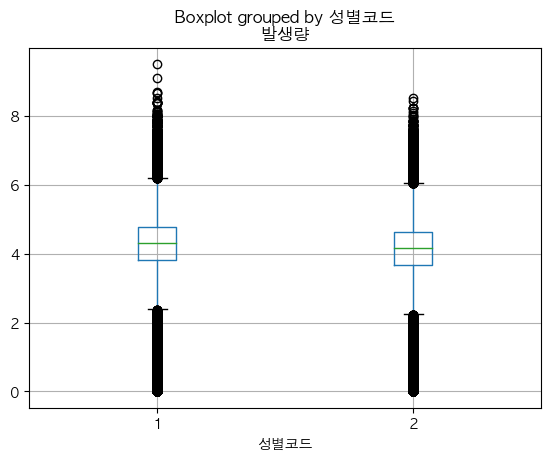

In [95]:
# boxplot
HP7.boxplot('발생량', '성별코드')
plt.show()

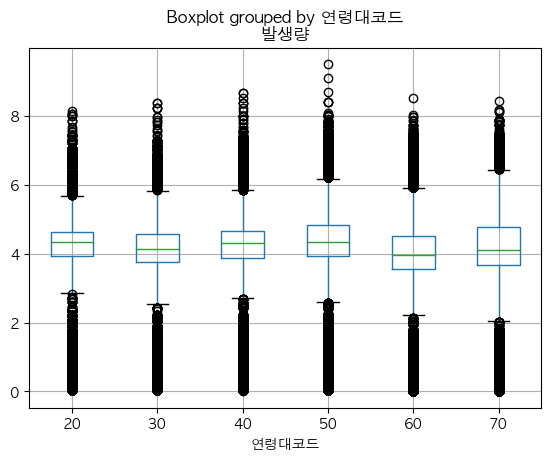

In [96]:
HP7.boxplot('발생량', '연령대코드')
plt.show()

In [97]:
# 타겟 value 로그 변환
HP7['발생량'] = np.log1p(HP7['발생량'])
HP7.head()

,성별코드,연령대코드,발생량
0,2,70,1.542282
1,2,70,1.542282
2,2,70,1.542282
3,2,70,1.542282
4,2,70,1.542282


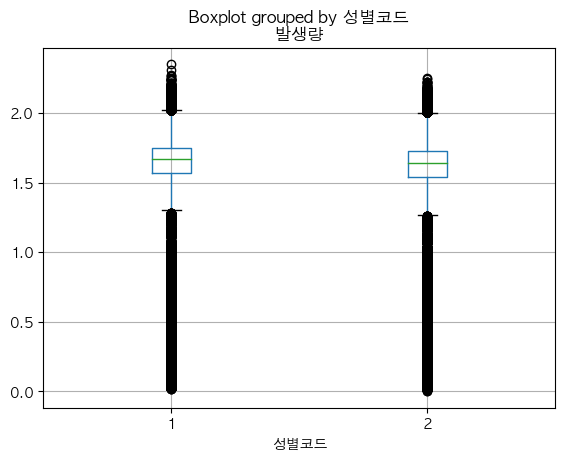

In [98]:
HP7.boxplot('발생량', '성별코드')
plt.show()

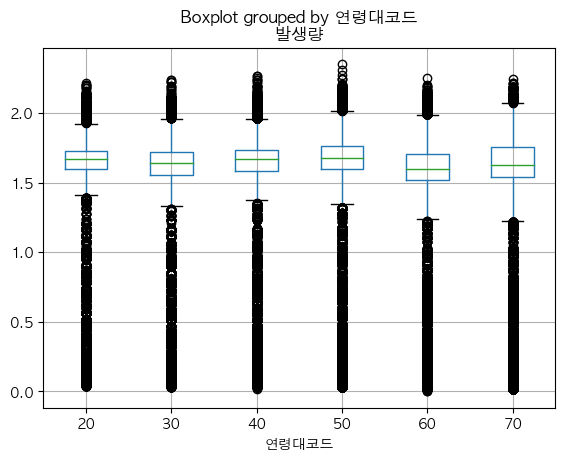

In [99]:
HP7.boxplot('발생량', '연령대코드')
plt.show()

In [100]:
HP7.head(20)

,성별코드,연령대코드,발생량
0,2,70,1.542282
1,2,70,1.542282
2,2,70,1.542282
3,2,70,1.542282
4,2,70,1.542282
5,2,70,1.542282
6,2,70,1.542282
7,2,70,1.542282
8,2,70,1.542282
9,2,70,1.542282


In [101]:
X = HP7[['성별코드', '연령대코드']]
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,성별코드_2,연령대코드_30,연령대코드_40,연령대코드_50,연령대코드_60,연령대코드_70
0,1,0,0,0,0,1
1,1,0,0,0,0,1
2,1,0,0,0,0,1
3,1,0,0,0,0,1
4,1,0,0,0,0,1


In [102]:
Y = HP7['발생량']

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(396116, 6)
(99030, 6)
(396116,)
(99030,)


### 발생량 예측 Model

In [104]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [105]:
# intercept 확인
print(model.intercept_)

1.4880305416788426


In [106]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
성별코드_2,-0.028341
연령대코드_30,-0.008519
연령대코드_40,0.040317
연령대코드_50,0.099352
연령대코드_60,0.027897
연령대코드_70,0.087949


In [107]:
predictions = model.predict(X_test)
predictions

array([1.48758669, 1.57597928, 1.54763856, ..., 1.58738216, 1.47951144,
       1.50000676])

In [108]:
import statsmodels.api as sm
X_train_Sm = sm.add_constant(X_train)
X_train_Sm = sm.add_constant(X_train)
ls = sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                    발생량   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     590.5
Date:                Tue, 15 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:30:49   Log-Likelihood:            -2.3145e+05
No. Observations:              396116   AIC:                         4.629e+05
Df Residuals:                  396109   BIC:                         4.630e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4880      0.002    599.019      0.0

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 가정: 'df'는 pandas DataFrame이며, 'X'는 독립변수들의 DataFrame, 'Y'는 종속변수의 Series입니다.

# Gradient Boosting 모델을 설정하고 훈련시킵니다.
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# 검증 세트에서의 예측값을 구합니다.
Y_pred = model.predict(X_test)

# 성능 지표를 계산합니다.
mse = mean_squared_error(y_test, Y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.18972238439542344
Root Mean Squared Error: 0.4355713310072455
R-squared: 0.009601448946080837


### 구별 발생량 산출

In [110]:
HP7.head(20)

,성별코드,연령대코드,발생량
0,2,70,1.542282
1,2,70,1.542282
2,2,70,1.542282
3,2,70,1.542282
4,2,70,1.542282
5,2,70,1.542282
6,2,70,1.542282
7,2,70,1.542282
8,2,70,1.542282
9,2,70,1.542282


In [111]:
result = HP7.groupby(['성별코드', '연령대코드'])['발생량'].mean().reset_index()
result

,성별코드,연령대코드,발생량
0,1,20,1.499759
1,1,30,1.496407
2,1,40,1.538513
3,1,50,1.590968
4,1,60,1.515660
5,1,70,1.549625
6,2,20,1.449715
7,2,30,1.436756
8,2,40,1.490795
9,2,50,1.556267


In [112]:
# HP7 데이터프레임에서 성별과 연령대를 결합하여 새로운 컬럼 생성
result_70 = result[result['연령대코드'] == '70']
result_else = result[result['연령대코드'] != '70']
result_70['성별연령대'] = result_70['성별코드'].apply(lambda x: '남자' if x == 1 else '여자') + result_70['연령대코드'] + '대이상생활인구수'
result_else['성별연령대'] = result_else['성별코드'].apply(lambda x: '남자' if x == 1 else '여자') + result_else['연령대코드'] + '대생활인구수'

In [113]:
# 데이터프레임 생성
df2 = pd.DataFrame({
    '성별코드': [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
    '연령대코드': [20, 30, 40, 50, 60, 70, 20, 30, 40, 50, 60, 70],
    '발생량': [3.906086, 3.853855, 4.016557, 4.248356, 3.883369, 4.015097, 3.686371, 3.599285, 3.803874, 4.070049, 3.723976, 4.020908],
    '성별연령대': ['남자20대생활인구수', '남자30대생활인구수', '남자40대생활인구수', '남자50대생활인구수', '남자60대생활인구수', '남자70세이상생활인구수', '여자20대생활인구수', '여자30대생활인구수', '여자40대생활인구수', '여자50대생활인구수', '여자60대생활인구수', '여자70세이상생활인구수']
})

# 두 데이터프레임 연결
result = df2

In [114]:
result

,성별코드,연령대코드,발생량,성별연령대
0,1,20,3.906086,남자20대생활인구수
1,1,30,3.853855,남자30대생활인구수
2,1,40,4.016557,남자40대생활인구수
3,1,50,4.248356,남자50대생활인구수
4,1,60,3.883369,남자60대생활인구수
5,1,70,4.015097,남자70세이상생활인구수
6,2,20,3.686371,여자20대생활인구수
7,2,30,3.599285,여자30대생활인구수
8,2,40,3.803874,여자40대생활인구수
9,2,50,4.070049,여자50대생활인구수


In [115]:
LP4

,행정구역(구동)별(1),행정구역(구동)별(2),남자20대생활인구수,남자30대생활인구수,남자40대생활인구수,남자50대생활인구수,남자60대생활인구수,남자70세이상생활인구수,여자20대생활인구수,여자30대생활인구수,여자40대생활인구수,여자50대생활인구수,여자60대생활인구수,여자70세이상생활인구수
1,장안구,소계,23785,17445,21867,24630,16541,10226,19724,15623,22290,24652,16905,14985
2,장안구,파장동,1815,1585,1811,2212,1756,1048,1501,1338,1721,2151,1784,1572
3,장안구,율천동,6200,3042,3078,3314,2079,1106,3861,2616,3077,3338,2014,1669
4,장안구,정자1동,2098,1654,2427,2585,1565,926,1846,1657,2707,2706,1703,1415
5,장안구,정자2동,2518,2566,3030,3063,1867,1283,2481,2431,3139,3070,2033,1897
6,장안구,정자3동,3209,2130,3887,3920,1655,839,2967,2131,4525,3644,1464,1330
7,장안구,영화동,1345,1339,1534,1993,1799,1159,1250,1023,1265,1859,1913,1592
8,장안구,송죽동,1485,1341,1528,1744,1348,790,1433,1231,1444,1873,1407,1110
9,장안구,조원1동,2228,1779,2163,2661,2020,1310,1957,1446,2043,2709,2030,1874
10,장안구,조원2동,1415,940,1252,1714,1209,752,1331,1011,1465,2033,1102,1072


In [116]:
LP5 = LP4[LP4['행정구역(구동)별(2)'] == '소계']

In [117]:
LP5.columns[2:]

Index(['남자20대생활인구수', '남자30대생활인구수', '남자40대생활인구수', '남자50대생활인구수', '남자60대생활인구수',
       '남자70세이상생활인구수', '여자20대생활인구수', '여자30대생활인구수', '여자40대생활인구수', '여자50대생활인구수',
       '여자60대생활인구수', '여자70세이상생활인구수'],
      dtype='object')

In [118]:
LP5

,행정구역(구동)별(1),행정구역(구동)별(2),남자20대생활인구수,남자30대생활인구수,남자40대생활인구수,남자50대생활인구수,남자60대생활인구수,남자70세이상생활인구수,여자20대생활인구수,여자30대생활인구수,여자40대생활인구수,여자50대생활인구수,여자60대생활인구수,여자70세이상생활인구수
1,장안구,소계,23785,17445,21867,24630,16541,10226,19724,15623,22290,24652,16905,14985
12,권선구,소계,27618,29819,31255,30395,21500,11161,25245,26653,29212,31208,22024,15631
25,팔달구,소계,15512,14785,14220,15810,11986,7491,14794,12278,13232,15315,12536,10464
36,영통구,소계,29768,30968,32933,27742,14952,7111,27812,29634,34215,27735,14885,10582


### 자치구 도출

In [119]:
result_dict = result.set_index('성별연령대')['발생량'].to_dict()

# LP_fin 데이터 프레임의 각 컬럼에 대해 반복하여 지역구별 발생량 계산
for col in LP5.columns[2:]:
    LP5[col] = LP5[col] * result_dict[col]

# 각 지역구의 전체 발생량을 계산
LP5['전체발생량'] = LP5.iloc[:, 1:].sum(axis=1)

# 가장 높은 발생량을 가진 지역구 찾기
max_region = LP5.loc[LP5['전체발생량'].idxmax(), '행정구역(구동)별(1)']
max_region

'권선구'

In [120]:
LP5.rename(columns = {'행정구역(구동)별(1)':'시군구명'}, inplace = True)
LP5.rename(columns = {'전체발생량':'폐의약품 발생량'}, inplace = True)
LP5.drop('행정구역(구동)별(2)', axis = 1, inplace = True)

In [121]:
LP5['총생활인구수'] = LP4[['남자20대생활인구수', '남자30대생활인구수', '남자40대생활인구수', '남자50대생활인구수',
       '남자60대생활인구수', '남자70세이상생활인구수', '여자20대생활인구수', '여자30대생활인구수', '여자40대생활인구수',
       '여자50대생활인구수', '여자60대생활인구수', '여자70세이상생활인구수']].sum(axis = 1)

In [122]:
LP5.reset_index(drop=True, inplace=True)

In [123]:
LP5

,시군구명,남자20대생활인구수,남자30대생활인구수,남자40대생활인구수,남자50대생활인구수,남자60대생활인구수,남자70세이상생활인구수,여자20대생활인구수,여자30대생활인구수,여자40대생활인구수,여자50대생활인구수,여자60대생활인구수,여자70세이상생활인구수,폐의약품 발생량,총생활인구수
0,장안구,92906.255510,67230.500475,87830.051919,104637.008280,64234.806629,41058.381922,72709.981604,56231.629555,84788.351460,100334.847948,62953.814280,60253.306380,8.951689e+05,228673
1,권선구,107878.283148,114918.102245,125537.489035,129128.780620,83492.433500,44812.497617,93062.435895,95931.743105,111118.767288,127018.089192,82016.847424,62850.812948,1.177766e+06,301721
2,팔달구,60591.206032,56979.246175,57115.440540,67166.508360,46546.060834,30077.091627,54536.172574,44192.021230,50332.860768,62332.800435,46683.763136,42074.781312,6.186280e+05,158423
3,영통구,116276.368048,119346.181640,132277.271681,117857.892152,58064.133288,28551.354767,102525.350252,106661.211690,130149.548910,112882.809015,55431.382760,42549.248456,1.122573e+06,288337


In [124]:
# 총 생활인구수 검토
temp_list = LP5['총생활인구수'].to_list()
temp_sum = temp_list[0] + temp_list[1] + temp_list[2] + temp_list[3]
print(temp_list[0] / temp_sum)
print(temp_list[1] / temp_sum)
print(temp_list[2] / temp_sum)
print(temp_list[3] / temp_sum)

0.23401940738102694
0.30877528004797605
0.1621269523534673
0.2950783602175297


In [125]:
# 폐의약품 발생량 검토 
temp_list1 = LP5['폐의약품 발생량'].to_list()
temp_sum1 = temp_list1[0] + temp_list1[1] + temp_list1[2] + temp_list1[3]
print(temp_list1[0] / temp_sum1)
print(temp_list1[1] / temp_sum1)
print(temp_list1[2] / temp_sum1)
print(temp_list1[3] / temp_sum1)

0.2346977018854566
0.3087898034023183
0.16219347328062966
0.2943190214315955


In [ ]:
#LP5.to_csv('/data/수원시_인구데이터(최종).csv')